Be klaidų veikianti versija - [per nbviewer](https://nbviewer.jupyter.org/github/loijord/matematikos_pamokos/blob/master/programa/Mantas/2020-11/2020-lapkritis.ipynb)

### Aštunta pamoka

Aštuntą pamoką tikrinomės Manto anksčiau atliktą [Projekto1](Projektas1) [pirmą testą](testas1.pdf), kuriame buvo kartojamos sunkesnės ankstesnių pamokų dalys. Testo rezultatai:

1\. $\boxed{+}$ Reiškinio įstatymas į kintamąjį lygybėje

2\. $\boxed{-}$ Dydžio, išreiškiamo $a^4$, apibūdinimas

3\. $\boxed{+}$ Pakartotinė laipsnio sudėtis ir daugyba

4\. $\boxed{+}$ Šaknies traukimo procedūra daugiklius vaizduojant kaip žėtonus

5\. $\boxed{-}$ Lygybės $\left(2^{-3}\right)^{2} = 2^{-6}$ atpažinimas daugiklių (vaizduojamų žėtonais) pagalba

6\. $\boxed{-}$ 1/2 ir 1/3 prasmė laipsnio rodiklyje

7\. $\boxed{-}$ Dalinių atvejų pavyzdžiai

8\. $\boxed{\approx}$ Taisyklingosios piramidės paviršiaus ploto skaičiavimas, kai žinomos briaunos

9\. $\boxed{+}$ Pitagoro trejetų apibrėžimas ir praktinis taikymas

10\. $\boxed{+}$ Daugianarių daugyba

11\. $\boxed{+}$ Pitagoro teoremos pradinis (antikinis) pavaizdavimas

12\. $\boxed{-}$ Bandymas nustatyti judančio kūno trajektoriją



Kiekvienam uždaviniui, kurio Mantas savarankiškai neįveikė, stengiausi surasti kuo daugiau pavyzdžių, padedančių suprasti medžiagą, kuria remiantis buvo sudaryti uždaviniai.

![](autumn.png)

### Dydžiai

* $a$ žymimas atkarpos ilgis
* $a^2$ žymimas kvadrato plotas
* $a^3$ žymimas kubo tūris
* $a^4$ sugalvoti sunkiau, nes gyvename tik trimačiame pasaulyje. Galėjome remtis paveikslėliu $a^4$ priskirti tūrį $a$ kubų, kurio kiekvieno kraštinė lygi $a$. Sunkesnis momentas buvo skaičiaus $a$ laikymas skirtingais dalykais priklausomai nuo situacijos.
* Vėliau Mantas patvirtino, kad galėtų sugalvoti ir $a^7$ prasmę.

***Dydžiu galime vadinti savybę, kuriai priskiriamas skaičius pasirenkant matavimo vienetą***. Pavyzdžiui Saturno temperatūra yra dydis, kuriam galima priskirti skaičių 100 ir matavimo vienetą - kelvinus. Pagal Vikipediją, [fizikinis dydis](https://lt.wikipedia.org/wiki/Fizikinis_dydis) yra išreiškiamas jo skaitinės vertės ir matavimo vieneto sandauga. 1822 metais matavimo vieneto sąvoką pirmasis įvedė prancūzų mokslininkas Furjė.

### Žėtonai
Nors šaknies traukimas įsivaizduojant daugiklius kaip žėtonus jau aiškus, bet laipsnių operacijos dar nepilnai. Prie to galbūt prisideda vienas prieštaravimas.

***Sudėtis vs atimtis***. Skaičius -2 turi dvigubą interpretaciją. Tai gali būti ir skaičius, neigiamas skaičiui 2, ir tuo pačiu atėminys iš tam tikro turinio.

***Daugyba vs dalyba***. Panašų fokusą gauname ir žaidime su žėtonais, kur leistina tik daugyba arba dalyba, bet ne sudėtis ir atimtis. Apverstas žėtonas $\boxed{2}$ atitinka skaičių, atvirkštinį 2, t.y. $\frac{1}{2}$ arba $2^{-1}$. Bet tuo pačiu apverstas dvejetas atitinka ir daliklį, iš kurio dalijamas tam tikras dalinys. Kalbant apie žėtonus anksčiau būdavo labiau akcentuojama, kad apversti žėtoną reiškia pakeisti dalybą į daugybą, bet, kad tai susiję su neigiamu laipsnio rodikliu arba atvirkštiniu skaičiumi, galbūt nebuvo taip aiškiai matyti.

### Trupmenos rodiklyje
Trupmeniniai laipsnių rodikliai plačiai nagrinėjami 11 klasėje, bet šiandienai kol kas pravers žinoti, kokioje situacijoje jie gali atsirasti. Pagal aštuntos klasės programą galime pastebėti:
$$3^{1/2} \times 3^{1/2} = 3$$
$$3^{1/3} \times 3^{1/3} \times 3^{1/3} = 3$$
Manto spėjimas buvo, kad $3^{1/3}$ yra trečdalis trejeto, bet tai nelogiška, nes $1\times 1\times 1 \neq 3$. Iš tiesų, kaip anksčiau jau mokėmės, jei $x\times x = 3$, tai $x$ yra kvadratinė šaknis iš $3$. ($\approx 1,73$). Be to, jei $x\times x \times x = 3$, tai $x$ vadina kubine šaknimi iš $3$ ($\approx 1,44$)

Galbūt nenatūraliai atrodo noras $3$ suskaidyti į tris dalis. Įprastai gyvenime esame įpratę, kad tai atitinka dalybą iš 3. Tačiau žėtonų žaidime net ir suskaidyti dalykai yra ne dedami, o dauginami. Todėl trečdalis daugiklio 3 žėtonų žaidime atitiktų tokį skaičių $x$, kad $x\times x\times x=3$.

Taip pat norint rasti atitikmenų tokiems skaičiams kaip $2^{3/5}$, galime parašyti: $2^{3/5} = \left(2^{1/5}\right)^3 = \sqrt[5]{2}^3$

### Papildomas triukas
Šį triuką dažniau sutiksime 9 klasėje. Galbūt jis pasirodys įsimintinas.

**Reiškinio fragmento pakeitimas skaičiavimams palengvinti**. Imkime pavyzdį: $$(a^2-2a+2)(a^2+2a+2)$$

Pagal įprastinę programą reiktų dauginti panariui, gauti 9 narius ir panašius narius sutraukti. Tačiau galime šią eigą palengvinti reiškinyje pastebėdami pasikartojantį fragmentą: $a^2+2$. Jei jį pažymime $x$, tai: $$(a^2-2a+2)(a^2+2a+2) = (x-2a)(x+2a) = x^2-4a^2 = (a^2+2)^2-4a^2 = a^4+4a^2+4-4a^2= a^4+4$$

### Atskirieji atvejai - kas tai yra?

Manau, jog bet kurios klasės mokyklinėje matematikos ar fizikos programoje nėra skirta pamokų, kur būtų aiškinama apie atskiruosius atvejus, todėl šią temą galima laikyti papildoma.

***Taisyklės (teiginio/teoremos/formulės) atskiru atveju atveju laikome kitą taisyklę, gautą įvedus papildomą sąlygą.*** Šią ir ankstesnę pamoką kalbėjomės apie tokius pavyzdžius:

|Taisyklė| Sąlyga | Atskiras atvejis |
|:---:|:---:|:---:|
|Tarkime trikampis, kurio statinių ilgiai lygūs $a$ ir $b$, o įžambinės ilgis lygus $c$, status. Tada $a^2+b^2=c^2$|Atvejis $\boxed{a=b}$|Tarkime trikampis, kurio abiejų statinių ilgiai lygūs $a$, o įžambinės ilgis lygus $c$, status. Tada $2a^2=c^2$|
|$(x+y)^2=x^2+2xy+y^2$|Atvejis $\boxed{y=2}$|$(x+2)^2=x^2+4x+4$|
|$a^n = \underbrace{a \times a \times \dots \times a}_{n}$ |Atvejis $\boxed{a \to a^m}$ | $\left(a^m\right)^n = \underbrace{a^m \times a^m \times \dots \times a^m}_{n}$|
|Jei kūno neveikia išorinės jėgos, pradinis greitis lygus galutiniam greičiui |Atvejis, kai pradinis greitis nulinis | Jei kūno neveikia išorinės jėgos ir jo pradinis greitis nulinis, tai nulinis bus ir galutinis greitis|
|$(a+b)^2=a^2+2ab+b^2$|Atvejis, kai $a^2+b^2=1$|$(a+b)^2=2ab+1$|

Dar viena įdomesnė mintis būtų tvirtinimas, kad kvadratas yra atskiras stačiakampio atvejis. Žodžiuose ***kvadratas*** ir ***stačiakampis*** taisyklė/teiginys/teorema/formulė neatsispindi, bet vietoje jų reiktų panagrinėti jų apibrėžimus:

|Apibrėžimas| Sąlyga | Atskiras atvejis |
|:---:|:---:|:---:|
|Stačiakampis - tai keturkampis, kurio visi kampai statūs|Atvejis, kai kraštinės lygios|Kvadratas - tai keturkampis, kurio visi kampai statūs ir visos kraštinės lygios|




### Atskirieji atvejai: patogesnis būdas juos iliustruoti
Varginančiai ilgiems matematinių samprotavimų dėstymams sugalvojau vieną daugiau aiškumo suteikiantį būdą: logines konstrukcijas ***jei A teisinga tai teisinga B pagal teiginį C*** vaizduoti: $$\boxed{A} \stackrel{\begin{array}{c}\boxed{C} \\ \big\downarrow \end{array}}{\longrightarrow} \boxed{B}$$

Šį vaizdavimą galime taikyti ir kalbant apie atskiruosius atvejus:

$$\boxed{\text{taisyklė}} \stackrel{\begin{array}{c}\boxed{\text{sąlyga}} \\ \big\downarrow \end{array}}{\longrightarrow} \boxed{\text{atskiras atvejis}}$$

Per pamoką aptarėme, kaip atrodytų anksčiau minėti teiginiai juos pavaizdavus.

***Pavyzdys 1.***

$$\begin{array}{ccc}
\boxed{\stackrel{\stackrel{\boxed{\text{jei trikampis status, tai } a^2+b^2=c^2}}{\big\downarrow\longleftarrow\boxed{a=b}}}{\boxed{\text{jei trikampis status, tai } 2a^2=c^2}}}
&\text{  arba   }& 
\boxed{\boxed{\text{jei trikampis status, tai } a^2+b^2=c^2} \stackrel{\begin{array}{c}\boxed{a = b} \\ \big\downarrow \end{array}}{\longrightarrow} \boxed{\text{jei trikampis status, tai } 2a^2=c^2}}
\end{array}$$

***Pavyzdys 2.***

$$\begin{array}{ccc}
\boxed{\stackrel{\stackrel{\boxed{(x+y)^2 = x^2+2xy+y^2}}{\big\downarrow\longleftarrow\boxed{y=2}}}{\boxed{(x+2)^2 = x^2+4x+4}}}
&\text{  arba   }& 
\boxed{\boxed{(x+y)^2 = x^2+2xy+y^2} \stackrel{\begin{array}{c}\boxed{y = 2} \\ \big\downarrow \end{array}}{\longrightarrow} \boxed{(x+2)^2 = x^2+4x+4}}
\end{array}$$

***Pavyzdys 3.***

$$\begin{array}{ccc}
\boxed{\stackrel{\stackrel{\boxed{u = v}\phantom{xxxxxxxxx}}{\big\downarrow\longleftarrow\boxed{u = 0}}}{\boxed{v = 0}\phantom{xxxxxx}}}
&\text{  arba   }& 
\boxed{\boxed{u = v} \stackrel{\begin{array}{c}\boxed{u = 0} \\ \big\downarrow \end{array}}{\longrightarrow} \boxed{v = 0}}
\end{array}$$

***Pavyzdys 4.***

$$\begin{array}{ccc}
\boxed{\stackrel{\stackrel{\boxed{a^n = \underbrace{a \times a \times \dots \times a}_{n}}}{\big\downarrow\longleftarrow\boxed{a \to a^m}}}{\boxed{\left(a^m\right)^n = \underbrace{a^m \times a^m \times \dots \times a^m}_{n}}}}
&\text{  arba   }& 
\boxed{\boxed{a^n = \underbrace{a \times a \times \dots \times a}_{n}} \stackrel{\begin{array}{c}\boxed{a \to a^m} \\ \big\downarrow \end{array}}{\longrightarrow} \boxed{\left(a^m\right)^n = \underbrace{a^m \times a^m \times \dots \times a^m}_{n}}}
\end{array}$$

***Pavyzdys 5.***

$$\begin{array}{ccc}
\boxed{\stackrel{\stackrel{\boxed{(a+b)^2=a^2+2ab+b^2}}{\big\downarrow\longleftarrow\boxed{a^2+b^2 = 1}}}{\boxed{(a+b)^2=2ab+1}}}
&\text{  arba   }& 
\boxed{(a+b)^2=a^2+2ab+b^2} \stackrel{\begin{array}{c}\boxed{a^2+b^2 = 1} \\ \big\downarrow \end{array}}{\longrightarrow} \boxed{(a+b)^2=2ab+1}
\end{array}$$

### Trajektorijos

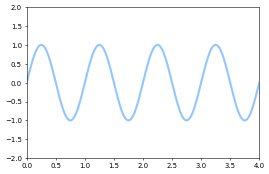

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation
plt.rcParams['figure.dpi'] = 50  
from IPython.display import HTML
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.05 * i))
    line.set_data(x, y)
    return line,

#anim = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
ani = matplotlib.animation.FuncAnimation(plt.gcf(), func=animate, frames=225+1, interval=100)

HTML(ani.to_jshtml()) #or HTML(ani.to_html5_video())

### Geometrija

### Už pamokos ribų

* Geometrinis stojamasis
* Laiko skaičiavimas
* Languotieji stačiakampiai
* Penkiamatė daugyba